In [54]:
import numpy as np
import pandas as pd

In [57]:
features = []
with open('UCI_HAR_Dataset1/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: ', len(features))

No of Features:  561


In [56]:
features=[]
for i in l:
    if i in features:
        continue
    else:
        features.append(i)
len(features)

477

In [58]:
xtr= pd.read_csv('UCI_HAR_Dataset1/train/X_train.txt', delim_whitespace=True, header=None)
xtr.columns= features
# add subject column to the dataframe
xtr['subject'] = pd.read_csv('UCI_HAR_Dataset1/train/subject_train.txt', header=None, squeeze=True)

In [60]:
ytr= pd.read_csv('UCI_HAR_Dataset1/train/y_train.txt', names=['Activity'], squeeze=True)
ylabel= ytr.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

In [61]:
traindata=xtr
traindata["Activity"]= ytr
traindata["ActivityName"]=ylabel
traindata.shape

(7352, 564)

In [63]:
xte= pd.read_csv('UCI_HAR_Dataset1/test/X_test.txt', delim_whitespace=True, header=None)
xte.columns= features
# add subject column to the dataframe
xte['subject'] = pd.read_csv('UCI_HAR_Dataset1/test/subject_test.txt', header=None, squeeze=True)

In [64]:
yte= pd.read_csv('UCI_HAR_Dataset1/test/y_test.txt', names=['Activity'], squeeze=True)
yte_labels = yte.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

In [65]:
testdata=xte
testdata["Activity"]= yte
testdata["ActivityName"]= yte_labels
testdata.shape

(2947, 564)

# Data Cleaning

In [66]:
print('No of duplicates in traindata: {}'.format(sum(traindata.duplicated())))
print('No of duplicates in testdata : {}'.format(sum(testdata.duplicated())))

No of duplicates in traindata: 0
No of duplicates in testdata : 0


In [67]:
print('We have {} NaN/Null values in train'.format(traindata.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(testdata.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

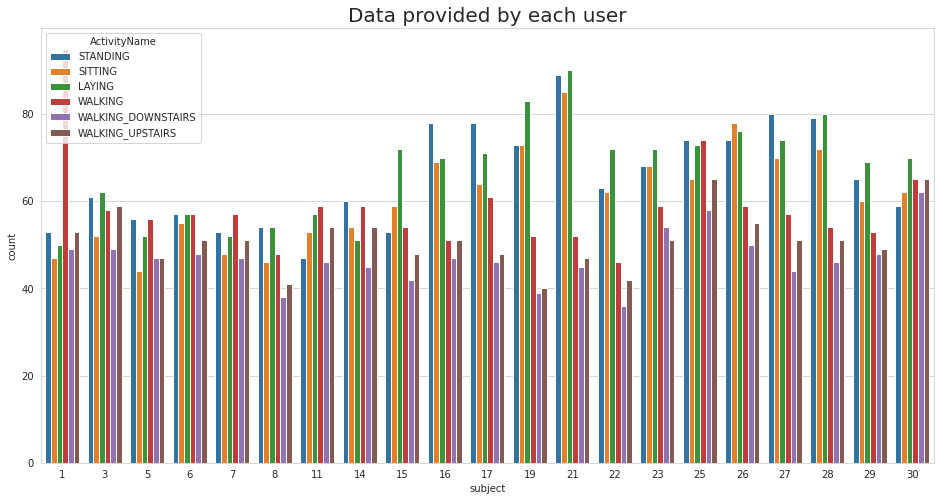

In [75]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = traindata)
plt.show()

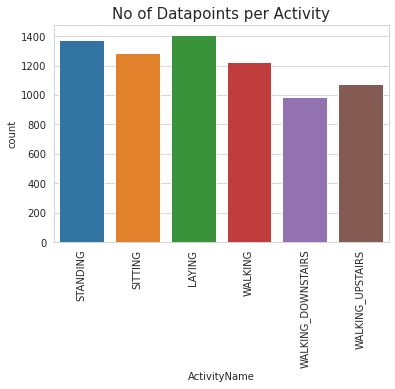

In [77]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(traindata.ActivityName)
plt.xticks(rotation=90)
plt.show()

From the above we can see that the data for laying down is maximum and for walking downstairs is the minimum. But the difference is not much, thus we can say the data is more or less balanced.

## Feature names preprocessing

In [78]:
columns = traindata.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

traindata.columns = columns
testdata.columns = columns

testdata.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

In [ ]:
## Saving the Train and Test dataframes to CSV

In [80]:
traindata.to_csv('traindata.csv', index=False)
testdata.to_csv('testdata.csv', index=False)

# Exploratory Data Analysis

C:\Users\adrat\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


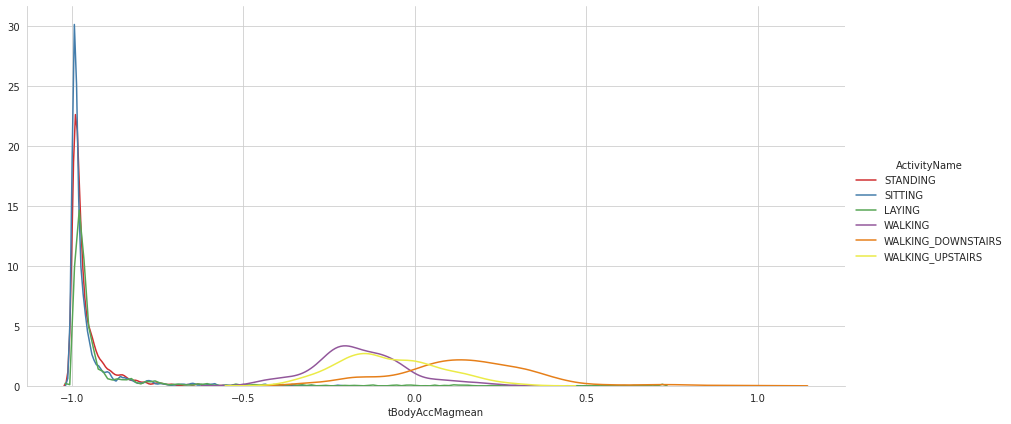

In [86]:
facetgrid = sns.FacetGrid(traindata, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False).add_legend()
plt.show()

1. From the above figure, we can clearly see the differenec bettwen the the stationary activities and the ones with require movement.
2. The spike on the left shows data regarding stationary activities, the data in the middle shows the motion activities.

In [88]:
# Creating different dataframes of same activities

df1 = traindata[traindata['Activity']==1]
df2 = traindata[traindata['Activity']==2]
df3 = traindata[traindata['Activity']==3]
df4 = traindata[traindata['Activity']==4]
df5 = traindata[traindata['Activity']==5]
df6 = traindata[traindata['Activity']==6]

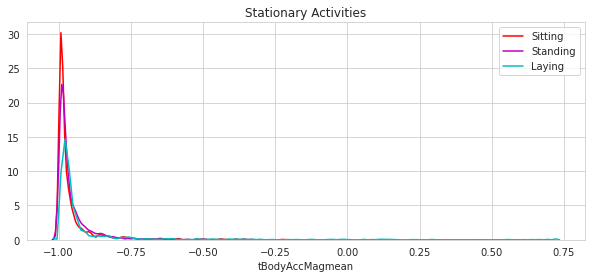

In [90]:
plt.figure(figsize=(10,4))
plt.title('Stationary Activities')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.legend()
plt.show()


The magnitude of tBodyAccMagmean varies from -1 to -0.8.

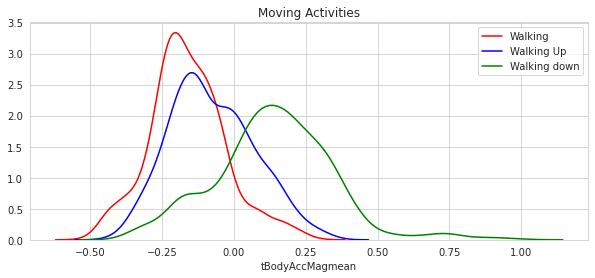

In [91]:
plt.figure(figsize=(10,4))
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend()
plt.show()

Here the magnitude of tBodyAccMagmean varies from -0.5 to 0.5. As we can see from the above 2 figures, the magnitude between both graphs differs with a wide margin. So, moving activities can be separated with the stationary ones on the basis of magnitude itself.

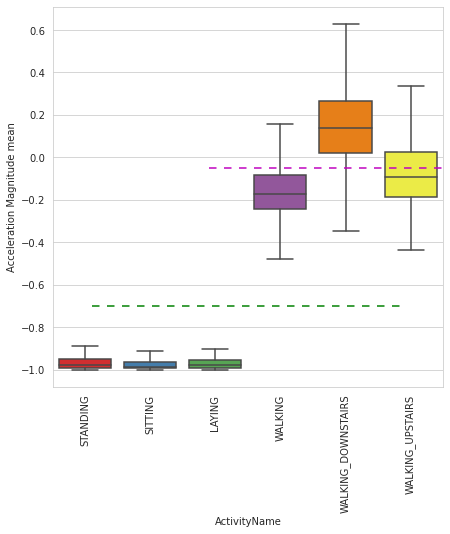

In [92]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=traindata, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

Observations:

1. If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
2. If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
3. If tAccMean > 0.0 then the Activity is WalkingDownstairs.

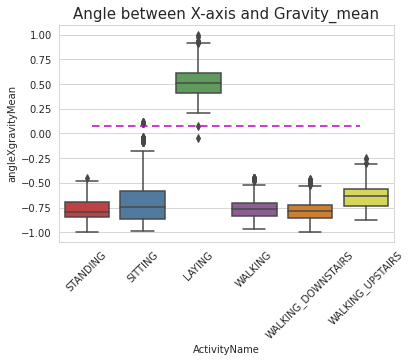

In [95]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=traindata)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 45)
plt.show()

# TSNE Implementation

In [97]:
import numpy as np
from sklearn.manifold import TSNE

In [99]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('t-sne visualization')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.208s...
[t-SNE] Computed neighbors for 7352 samples in 34.540s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.037s
[t-SNE] Iteration 50: error = 124.7039337, gradient norm = 0.0279804 (50 iterations in 4.958s)
[t-SNE] Iteration 100: error = 107.0270309, gradient norm = 0.0280505 (50 iterations in

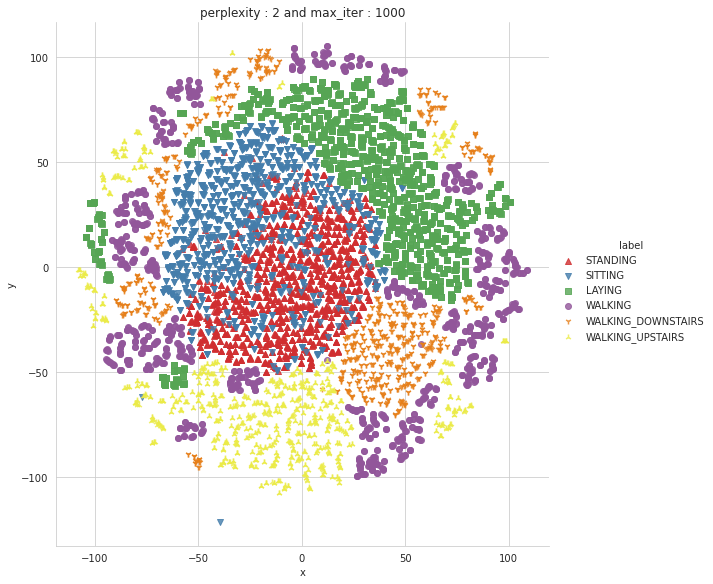

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.252s...
[t-SNE] Computed neighbors for 7352 samples in 35.704s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.063s
[t-SNE] Iteration 50: error = 113.7958145, gradient norm = 0.0237725 (50 iterations in 4.866s)
[t-SNE] Iteration 100: error = 96.9322739, gradient norm = 0.0141716 (50 iteratio

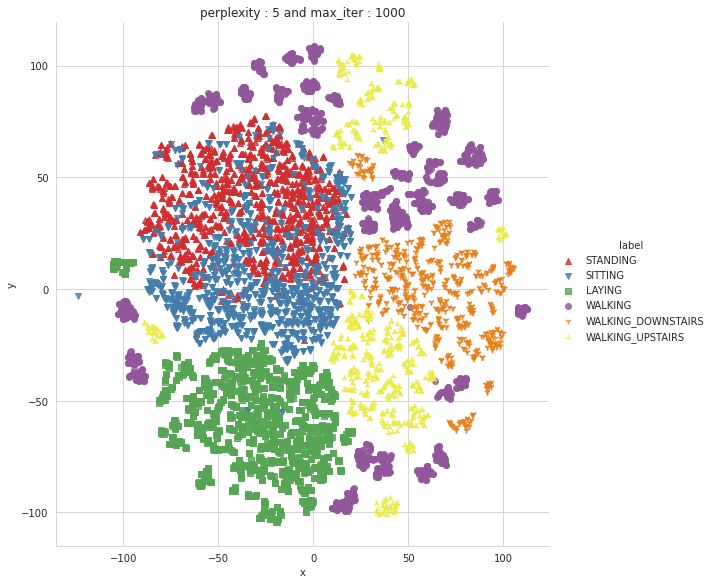

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.235s...
[t-SNE] Computed neighbors for 7352 samples in 36.830s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.074s
[t-SNE] Iteration 50: error = 105.3542633, gradient norm = 0.0253204 (50 iterations in 3.267s)
[t-SNE] Iteration 100: error = 90.5650253, gradient norm = 0.0103154 (50 iterati

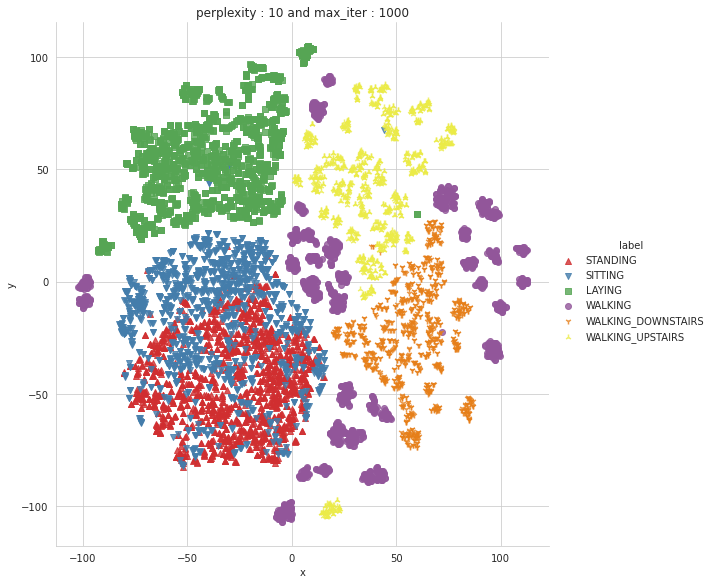

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.277s...
[t-SNE] Computed neighbors for 7352 samples in 37.325s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.140s
[t-SNE] Iteration 50: error = 97.0807571, gradient norm = 0.0278068 (50 iterations in 3.280s)
[t-SNE] Iteration 100: error = 83.9724655, gradient norm = 0.0101728 (50 iteratio

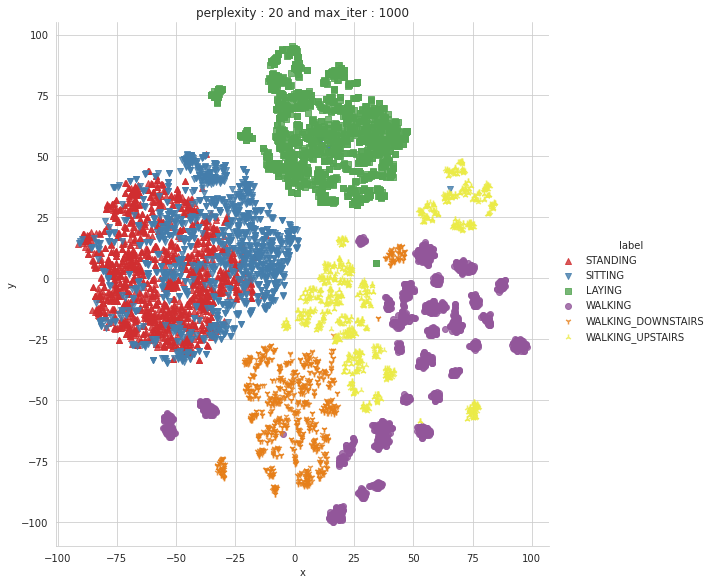

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.246s...
[t-SNE] Computed neighbors for 7352 samples in 37.951s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.343s
[t-SNE] Iteration 50: error = 86.5437164, gradient norm = 0.0183235 (50 iterations in 3.748s)
[t-SNE] Iteration 100: error = 75.8141556, gradient norm = 0.0051520 (50 iterati

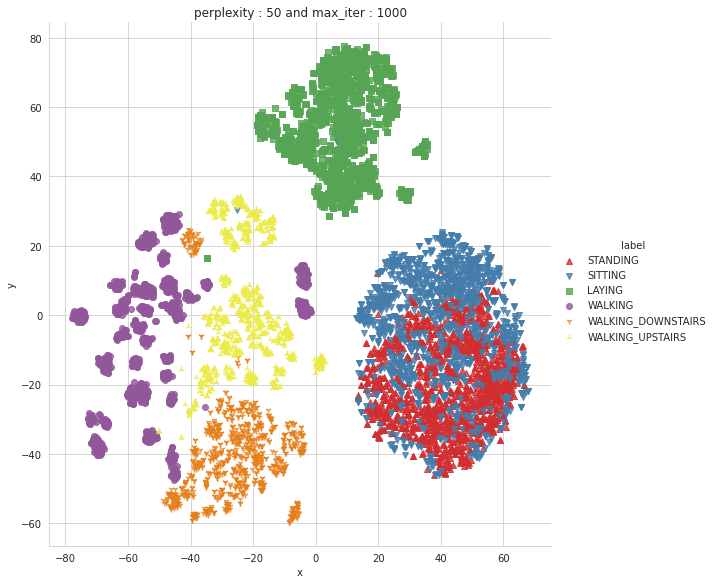

Done


In [100]:
X_pre_tsne = traindata.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = traindata['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

1. For graph 1 (perplexity 2, 1000 iter), most of the points are well clustered, the orange, yellow, green, except for blue and red (standing and sitting). A significant part is overlapping between the 2. 
2. The evaluation of graphs with different perplexities is similar to graph 1 as most of the classes are well separated except standing and sitting.